<a href="https://colab.research.google.com/github/eresytter/nltk_tutorial/blob/main/blue_whale_wrangling_and_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bs4
!pip install requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [2]:
source = urlopen("https://en.wikipedia.org/wiki/Blue_whale").read()
soup = BeautifulSoup(source,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Blue whale - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YBehVwpAMNQAAlwW2PcAAACB","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Blue_whale","wgTitle":"Blue whale","wgCurRevisionId":1003377725,"wgRevisionId":1003377725,"wgArticleId":4925,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","CS1 maint: multiple names: authors list","CS1 Spanish-language sources (es)","Articles with short description","Short description is different from Wikidata","Wikiped

In [3]:
# Extract plain text content from paragraphs
text = ''
for paragraph in soup.find_all('p'):
  text += paragraph.text
text

'\nThe blue whale (Balaenoptera musculus) is a marine mammal belonging to the baleen whale suborder Mysticeti. Reaching a maximum confirmed length of 29.9 meters (98 feet) and weight of 173 tonnes (190 tons), it is the largest animal known to have ever existed. The blue whale’s long and slender body can be various shades of grayish-blue dorsally and somewhat lighter underneath.\nThere are currently five subspecies of blue whale, recognized by the Society for Marine Mammalogy’s Committee on Taxonomy: B. m. musculus in the North Atlantic and North Pacific, B. m. intermedia in the Southern Ocean, B. m. brevicauda (the pygmy blue whale) in the Indian Ocean and South Pacific Ocean, B. m. indica in the Northern Indian Ocean, and B. m. unnamed subsp. in the waters off Chile. The blue whale diet consists almost exclusively of euphausiids (krill).\nThe blue whale was once abundant in nearly all the oceans on Earth until the end of the 19th century. It was hunted almost to the point of extinctio

In [4]:
# Further cleanup
text = re.sub(r'\[.*?\]+', '', text)
text = text.replace('\n', '')
text

'The blue whale (Balaenoptera musculus) is a marine mammal belonging to the baleen whale suborder Mysticeti. Reaching a maximum confirmed length of 29.9 meters (98 feet) and weight of 173 tonnes (190 tons), it is the largest animal known to have ever existed. The blue whale’s long and slender body can be various shades of grayish-blue dorsally and somewhat lighter underneath.There are currently five subspecies of blue whale, recognized by the Society for Marine Mammalogy’s Committee on Taxonomy: B. m. musculus in the North Atlantic and North Pacific, B. m. intermedia in the Southern Ocean, B. m. brevicauda (the pygmy blue whale) in the Indian Ocean and South Pacific Ocean, B. m. indica in the Northern Indian Ocean, and B. m. unnamed subsp. in the waters off Chile. The blue whale diet consists almost exclusively of euphausiids (krill).The blue whale was once abundant in nearly all the oceans on Earth until the end of the 19th century. It was hunted almost to the point of extinction by w

In [16]:
# TODO: eres: figure out how to do this with one line of code.
modified_text = re.sub(r"\(", "", text)
finaltext = re.sub(r"\)", "", modified_text)
print(finaltext)

The blue whale Balaenoptera musculus is a marine mammal belonging to the baleen whale suborder Mysticeti. Reaching a maximum confirmed length of 29.9 meters 98 feet and weight of 173 tonnes 190 tons, it is the largest animal known to have ever existed. The blue whale’s long and slender body can be various shades of grayish-blue dorsally and somewhat lighter underneath.There are currently five subspecies of blue whale, recognized by the Society for Marine Mammalogy’s Committee on Taxonomy: B. m. musculus in the North Atlantic and North Pacific, B. m. intermedia in the Southern Ocean, B. m. brevicauda the pygmy blue whale in the Indian Ocean and South Pacific Ocean, B. m. indica in the Northern Indian Ocean, and B. m. unnamed subsp. in the waters off Chile. The blue whale diet consists almost exclusively of euphausiids krill.The blue whale was once abundant in nearly all the oceans on Earth until the end of the 19th century. It was hunted almost to the point of extinction by whaling unti

In [17]:
# Tokenizing it
tokens = [tok for tok in finaltext.split()]
print(tokens[:100])

['The', 'blue', 'whale', 'Balaenoptera', 'musculus', 'is', 'a', 'marine', 'mammal', 'belonging', 'to', 'the', 'baleen', 'whale', 'suborder', 'Mysticeti.', 'Reaching', 'a', 'maximum', 'confirmed', 'length', 'of', '29.9', 'meters', '98', 'feet', 'and', 'weight', 'of', '173', 'tonnes', '190', 'tons,', 'it', 'is', 'the', 'largest', 'animal', 'known', 'to', 'have', 'ever', 'existed.', 'The', 'blue', 'whale’s', 'long', 'and', 'slender', 'body', 'can', 'be', 'various', 'shades', 'of', 'grayish-blue', 'dorsally', 'and', 'somewhat', 'lighter', 'underneath.There', 'are', 'currently', 'five', 'subspecies', 'of', 'blue', 'whale,', 'recognized', 'by', 'the', 'Society', 'for', 'Marine', 'Mammalogy’s', 'Committee', 'on', 'Taxonomy:', 'B.', 'm.', 'musculus', 'in', 'the', 'North', 'Atlantic', 'and', 'North', 'Pacific,', 'B.', 'm.', 'intermedia', 'in', 'the', 'Southern', 'Ocean,', 'B.', 'm.', 'brevicauda', 'the', 'pygmy']


In [19]:
# Make a freqdist out of it:
import nltk
freqtoken = nltk.FreqDist(tokens)
print(freqtoken)

<FreqDist with 2234 samples and 6817 outcomes>


In [20]:
# Let's take a look on frequencies of each token
for k,v in freqtoken.items():
  print(str(k)+':'+str(v))

The:51
blue:166
whale:91
Balaenoptera:8
musculus:6
is:72
a:116
marine:2
mammal:1
belonging:1
to:108
the:349
baleen:7
suborder:1
Mysticeti.:1
Reaching:1
maximum:4
confirmed:3
length:9
of:207
29.9:2
meters:1
98:2
feet:1
and:224
weight:5
173:1
tonnes:1
190:1
tons,:1
it:8
largest:4
animal:3
known:9
have:28
ever:1
existed.:1
whale’s:3
long:4
slender:4
body:6
can:16
be:31
various:1
shades:1
grayish-blue:2
dorsally:1
somewhat:2
lighter:1
underneath.There:1
are:50
currently:4
five:4
subspecies:22
whale,:6
recognized:8
by:33
Society:3
for:39
Marine:10
Mammalogy’s:3
Committee:4
on:28
Taxonomy::1
B.:26
m.:28
in:184
North:50
Atlantic:13
Pacific,:4
intermedia:2
Southern:11
Ocean,:10
brevicauda:6
pygmy:28
Indian:19
Ocean:16
South:15
Pacific:30
indica:5
Northern:7
unnamed:1
subsp.:1
waters:9
off:35
Chile.:2
diet:2
consists:2
almost:3
exclusively:2
euphausiids:2
krill.The:1
was:26
once:1
abundant:1
nearly:4
all:6
oceans:2
Earth:1
until:9
end:1
19th:2
century.:1
It:3
hunted:2
point:1
extinction:2
whali

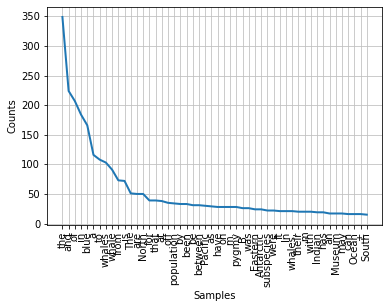

In [22]:
freqtoken.plot(50, cumulative=False)

In [27]:
# Get stopwords from nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
stop_words = set(stopwords.words('english'))
final_token = [w for w in tokens if not w in stop_words]
filtered_sentence = []
for w in tokens:
  if w not in stop_words:
    filtered_sentence.append(w)

print(tokens)
print(filtered_sentence)

['The', 'blue', 'whale', 'Balaenoptera', 'musculus', 'is', 'a', 'marine', 'mammal', 'belonging', 'to', 'the', 'baleen', 'whale', 'suborder', 'Mysticeti.', 'Reaching', 'a', 'maximum', 'confirmed', 'length', 'of', '29.9', 'meters', '98', 'feet', 'and', 'weight', 'of', '173', 'tonnes', '190', 'tons,', 'it', 'is', 'the', 'largest', 'animal', 'known', 'to', 'have', 'ever', 'existed.', 'The', 'blue', 'whale’s', 'long', 'and', 'slender', 'body', 'can', 'be', 'various', 'shades', 'of', 'grayish-blue', 'dorsally', 'and', 'somewhat', 'lighter', 'underneath.There', 'are', 'currently', 'five', 'subspecies', 'of', 'blue', 'whale,', 'recognized', 'by', 'the', 'Society', 'for', 'Marine', 'Mammalogy’s', 'Committee', 'on', 'Taxonomy:', 'B.', 'm.', 'musculus', 'in', 'the', 'North', 'Atlantic', 'and', 'North', 'Pacific,', 'B.', 'm.', 'intermedia', 'in', 'the', 'Southern', 'Ocean,', 'B.', 'm.', 'brevicauda', 'the', 'pygmy', 'blue', 'whale', 'in', 'the', 'Indian', 'Ocean', 'and', 'South', 'Pacific', 'Ocean

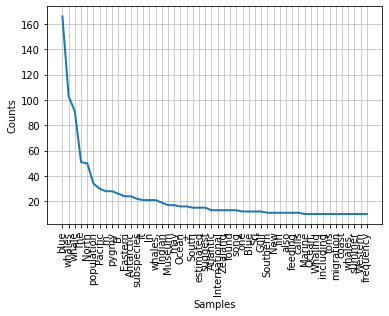

In [57]:
# We can do the freq_dist with a much cleaner data
freqtoken = nltk.FreqDist(filtered_sentence)
freqtoken.plot(50, cumulative=False)

In [59]:
import csv
import pandas as pd
fdist = nltk.FreqDist(filtered_sentence)
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
print(df_fdist)
df_fdist.to_csv("bluewhale.csv")

              Frequency
Term                   
The                  51
blue                166
whale                91
Balaenoptera          8
musculus              6
...                 ...
Animals.              1
enough                1
information           1
others                1
critically            1

[2145 rows x 1 columns]


In [61]:
df = pd.read_csv('bluewhale.csv')
df.head()

,Term,Frequency
0,The,51
1,blue,166
2,whale,91
3,Balaenoptera,8
4,musculus,6


In [33]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [67]:
reader = csv.reader(open('bluewhale.csv', 'r', newline='\n'))
d = {}
for k,v in reader:
  d[k] = int(v)
wordcloud = WordCloud().generate_from_frequencies(d)

ValueError: ignored

In [45]:

data = pd.read_csv(r"blue_whale.csv", encoding="latin-1")
data.head()

ParserError: ignored

In [49]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(filtered_sentence)
plot_cloud(wordcloud)

TypeError: ignored